In [1]:
from pycaret.datasets import get_data
from pycaret.classification import *
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
import pandas as pd
import numpy as np

In [2]:
df = get_data(dataset = 'income', profile=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df = df.dropna()
df = df.drop_duplicates()
df

age         workclass     education  education-num      marital-status  \
0       39         State-gov     Bachelors             13       Never-married   
1       50  Self-emp-not-inc     Bachelors             13  Married-civ-spouse   
2       38           Private       HS-grad              9            Divorced   
3       53           Private          11th              7  Married-civ-spouse   
4       28           Private     Bachelors             13  Married-civ-spouse   
...    ...               ...           ...            ...                 ...   
32554   53           Private       Masters             14  Married-civ-spouse   
32555   22           Private  Some-college             10       Never-married   
32556   27           Private    Assoc-acdm             12  Married-civ-spouse   
32558   58           Private       HS-grad              9             Widowed   
32560   52      Self-emp-inc       HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital-gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
...                  ...            ...    ...     ...           ...   
32554    Exec-managerial        Husband  White    Male             0   
32555    Protective-serv  Not-in-family  White    Male             0   
32556       Tech-support           Wife  White  Female             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32560    Exec-managerial           Wife  White  Female         15024   

       capital-loss  hours-per-week native-country  income >50K  
0                 0              40  United-States            0  
1                 0              13  United-States            0  
2                 0              40  United-States            0  
3                 0              40  United-States            0  
4                 0              40           Cuba            0  
...             ...             ...            ...          ...  
32554             0              40  United-States            1  
32555             0              40  United-States            0  
32556             0              38  United-States            0  
32558             0              40  United-States            0  
32560             0              40  United-States            1  

[26904 rows x 14 columns]

In [4]:
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
train, test = train_test_split(df, test_size=0.1, random_state=42, shuffle=True)

In [6]:
dataset = setup(data = train, target = 'income >50K', normalize = True, preprocess = True, ignore_features = [""])

In [7]:
best = compare_models()

In [8]:
best = create_model('xgboost')

In [9]:
tuned_best = tune_model(estimator = best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [10]:
predictions = predict_model(tuned_best, data=test)

In [11]:
predictions

age  workclass     education  education-num      marital-status  \
11399   37    Private  Some-college             10  Married-civ-spouse   
7323    26    Private     Bachelors             13       Never-married   
23585   64    Private       HS-grad              9  Married-civ-spouse   
2100    47  State-gov     Bachelors             13            Divorced   
24244   32    Private  Some-college             10       Never-married   
...    ...        ...           ...            ...                 ...   
9543    27    Private       HS-grad              9            Divorced   
22698   22    Private     Bachelors             13       Never-married   
2171    33    Private       HS-grad              9           Separated   
5557    37    Private  Some-college             10           Separated   
3135    60    Private       HS-grad              9  Married-civ-spouse   

             occupation    relationship   race     sex  capital-gain  \
11399     Other-service         Husband  White    Male             0   
7323     Prof-specialty   Not-in-family  White    Male             0   
23585             Sales         Husband  White    Male             0   
2100    Exec-managerial   Not-in-family  White  Female             0   
24244     Other-service       Own-child  White    Male             0   
...                 ...             ...    ...     ...           ...   
9543       Craft-repair  Other-relative  Other    Male             0   
22698      Adm-clerical       Own-child  White  Female             0   
2171    Protective-serv       Own-child  White  Female             0   
5557      Other-service       Unmarried  White  Female             0   
3135   Transport-moving         Husband  White    Male             0   

       capital-loss  hours-per-week native-country  income >50K  \
11399             0              40  United-States            0   
7323              0              48  United-States            0   
23585             0              65  United-States            1   
2100              0              40  United-States            1   
24244             0              35  United-States            0   
...             ...             ...            ...          ...   
9543              0              40  United-States            0   
22698             0              10  United-States            0   
2171              0              40  United-States            0   
5557              0              40  United-States            0   
3135              0              40  United-States            0   

       prediction_label  prediction_score  
11399                 0            0.7461  
7323                  0            0.9646  
23585                 0            0.5745  
2100                  0            0.8529  
24244                 0            0.9981  
...                 ...               ...  
9543                  0            0.9944  
22698                 0            0.9993  
2171                  0            0.9935  
5557                  0            0.9834  
3135                  0            0.6389  

[2691 rows x 16 columns]

In [12]:
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

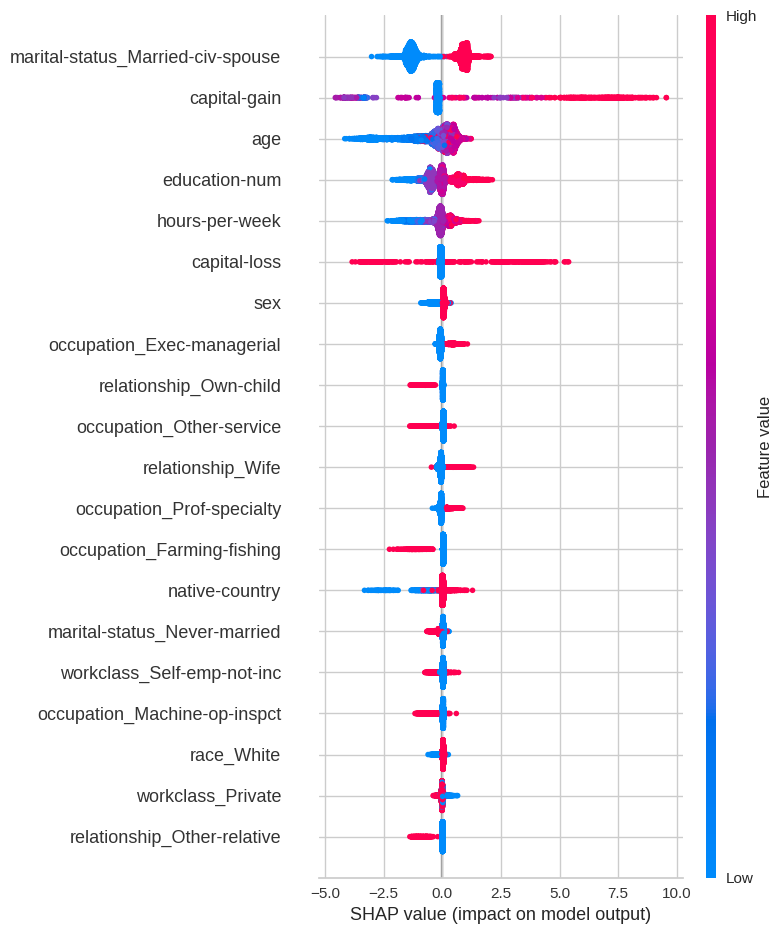

In [13]:
interpret_model(tuned_best)

In [14]:
final_model = finalize_model(tuned_best)

In [15]:
save_model(final_model,"income")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'education-num',
                                              'capital-gain', 'capital-loss',
                                              'hours-per-week'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_im...
                                importanc